# Python

### problem statement
There is a road which is mostly straight except for a few 90° turns. The road when converted to
coordinate system gives the following values.
point 1 0.00 1.41
point 2 0.71 2.12
point 3 1.41 2.83
point 4 -1.41 5.66
point 5 -0.71 6.36
point 6 0.00 7.07
point 7 2.83 4.24
point 8 4.24 5.66
point 9 4.95 6.36
point 10 5.66 5.66
point 11 6.36 6.36
point 12 7.07 7.07
point 13 6.36 7.78
point 14 7.07 8.49
point 15 7.78 9.19
point 16 8.49 9.90
point 17 9.19 10.61
point 18 7.78 12.02
point 19 9.19 13.44
point 20 11.31 11.31
point 21 12.02 12.02
point 22 11.31 12.73
point 23 12.02 13.44

1.Build a python code to detect the points that are out of the straight route. The code should
automatically fix such points, so that a straight route is obtained. (Assume a straight route is
available always).
2.2.There is a straight route available from point1 to point14. However, if we follow the road as given
above, it involves unnecessary turns. What points should be corrected, to obtain a straight route?
2.3.Write a code to calculate the distance between 2 points if traversed by the above road

In [2]:
# Define the coordinates of the given points
points = [(0.00, 1.41), (0.71, 2.12), (1.41, 2.83), (-1.41, 5.66), (-0.71, 6.36), (0.00, 7.07),
          (2.83, 4.24), (4.24, 5.66), (4.95, 6.36), (5.66, 5.66), (6.36, 6.36), (7.07, 7.07),
          (6.36, 7.78), (7.07, 8.49), (7.78, 9.19), (8.49, 9.90), (9.19, 10.61), (7.78, 12.02),
          (9.19, 13.44), (11.31, 11.31), (12.02, 12.02), (11.31, 12.73), (12.02, 13.44)]

### 2.3.Write a code to calculate the distance between 2 points if traversed by the above road.

In [7]:
import math
# calculating total distance travelled
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calculate the total distance along the given road
total_distance = 0
for i in range(len(points) - 1):
    total_distance += calculate_distance(points[i], points[i + 1])

print(f"Total distance along the given road: {total_distance:.2f} units")


Total distance along the given road: 33.00 units


### Explanation

- The calculate_distance function takes two points, point1 and point2, represented as (x, y) coordinates. It calculates the Euclidean distance between these two points using the distance formula: sqrt((x2 - x1)^2 + (y2 - y1)^2). This formula measures the straight-line distance between two points in a two-dimensional space.

- The variable total_distance is initialized to 0. It will be used to store the cumulative total distance as the code iterates through the points.

- A for loop iterates through the points using the range(len(points) - 1) range. This loop is set to stop at the second-to-last point since it calculates the distance between consecutive points, and there's no point beyond the last one.

- Inside the loop, the code calculates the distance between the current point (points[i]) and the next point (points[i + 1]) by calling the calculate_distance function. It then adds this distance to the total_distance.

### 2.2.There is a straight route available from point1 to point14. However, if we follow the road as given above, it involves unnecessary turns. What points should be corrected, to obtain a straight route?

## Method 1

In [31]:
# Function to calculate the distance between two points
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Function to check if three points are collinear
def are_collinear(p1, p2, p3):
    return round((distance(p1, p2) + distance(p2, p3)),4) == round(distance(p1, p3),4)

# Initialize a list to store points that are not collinear
not_collinr = []
# Saving first collinear points 
for i in range(3,len(points)+1):
    if are_collinear(points[i-2],points[i-1],points[i]):
        point1 = points[i-2]
        point2 = points[i-1]
        collinir_points = [i-2,i-1]
        break
        
# Checking each points for collinier and appending to collinir_points
for i in range(3, 15):
    if are_collinear(points[1],points[2],points[i]):
        collinir_points.extend([i])
    else:
        not_collinr.extend([i])
        
    
print(f"points in straight line {collinir_points}")
print(f"points which are not in straight line {not_collinr}")

points in straight line [1, 2, 3, 7, 8, 9, 13, 14]
points which are not in straight line [4, 5, 6, 10, 11, 12]


## Method 2

In [30]:
def calculate_slope(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    if x2 - x1 == 0:
        return float('inf')  # Vertical line, infinite slope
    return round((y2 - y1) / (x2 - x1),1)
# Define the indices of point 1 and point 14
point1_index = 1
point14_index = 13

# Calculate the expected slope between point 1 and point 14
expected_slope = calculate_slope(points[point1_index], points[point14_index])

# Identify points that need correction
points_to_correct = []

for i in range(point1_index, point14_index):
    actual_slope = calculate_slope(points[i], points[i + 1])

    if expected_slope != actual_slope:
        points_to_correct.append(i + 1)

print(f"Points to correct for a straight route: {points_to_correct}")


Points to correct for a straight route: [4, 7, 10, 13]


### Explanation
- calculate_slope is a function that takes two points, point1 and point2, and calculates the slope of the line connecting them. It checks if the line is vertical (infinite slope) or calculates the slope in other cases.

- point1_index is set to 0, which corresponds to the first point, and point14_index is set to 13, which corresponds to the fourteenth point.

- The expected slope between point1 and point14 is calculated using the calculate_slope function. This represents the slope of the straight line connecting these two points.

- An empty list points_to_correct is initialized to store the indices of points that need correction to achieve a straight route.

- A loop iterates through the points from point1 (index point1_index) to the point just before point14 (index point14_index - 1). In each iteration, it calculates the actual slope between the current point and the next point.

- The actual slope between the current point and the next point is compared to the expected slope (which is zero for a straight route). If the expected and actual slopes do not match (i.e., the road deviates from a straight line), the index of the next point (i + 1) is added to the points_to_correct list.

- Finally, the code prints the indices of the points that need to be corrected to achieve a straight route.

### 2.1.Build a python code to detect the points that are out of the straight route. The code should automatically fix such points, so that a straight route is obtained. (Assume a straight route is available always).

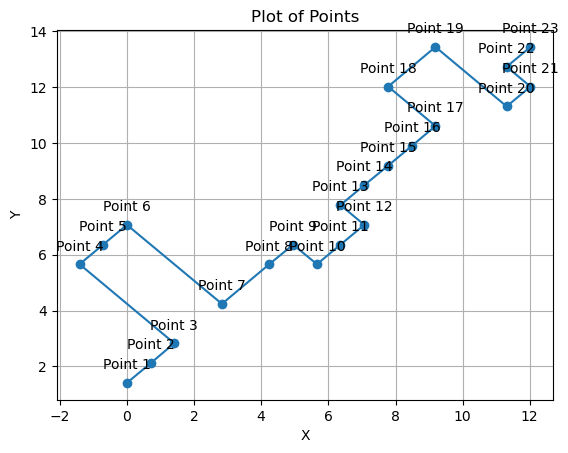

In [10]:
# plotting Original points
import matplotlib.pyplot as plt

points = {
    1: (0.00, 1.41),
    2: (0.71, 2.12),
    3: (1.41, 2.83),
    4: (-1.41, 5.66),
    5: (-0.71, 6.36),
    6: (0.00, 7.07),
    7: (2.83, 4.24),
    8: (4.24, 5.66),
    9: (4.95, 6.36),
    10: (5.66, 5.66),
    11: (6.36, 6.36),
    12: (7.07, 7.07),
    13: (6.36, 7.78),
    14: (7.07, 8.49),
    15: (7.78, 9.19),
    16: (8.49, 9.90),
    17: (9.19, 10.61),
    18: (7.78, 12.02),
    19: (9.19, 13.44),
    20: (11.31, 11.31),
    21: (12.02, 12.02),
    22: (11.31, 12.73),
    23: (12.02, 13.44)
}
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]

plt.plot(x, y, marker='o', linestyle='-')
plt.title('Plot of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'Point {i + 1}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

## Method 1

In [26]:
#Final code

# Function to calculate the distance between two points
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Function to check if three points are collinear
def are_collinear(p1, p2, p3):
    return round((distance(p1, p2) + distance(p2, p3)),4) == round(distance(p1, p3),4)

# Initialize a list to store points that are not collinear
not_collinr = []
# Saving first collinear points 
for i in range(3,len(points)+1):
    if are_collinear(points[i-2],points[i-1],points[i]):
        point1 = points[i-2]
        point2 = points[i-1]
        collinir_points = [i-2,i-1]
        break
        
# Checking each points for collinier and appending to collinir_points
for i in range(3, len(points)+1):
    if are_collinear(points[1],points[2],points[i]):
        collinir_points.extend([i])
    else:
        not_collinr.extend([i])
        
    
print(f"points in straight line {collinir_points}")
print(f"points which are not in straight line {not_collinr}")

points in straight line [1, 2, 3, 7, 8, 9, 13, 14, 15, 16, 17, 22, 23]
points which are not in straight line [4, 5, 6, 10, 11, 12, 18, 19, 20, 21]


### Explanation
- This function, distance, calculates the Euclidean distance between two points represented by tuples (x1, y1) and (x2, y2). It uses the Pythagorean theorem to find the straight-line distance between these two points.
- This function, are_collinear, checks if three points (p1, p2, p3) are collinear. It does this by comparing the sum of the distances from p1 to p2 and from p2 to p3 with the distance from p1 to p3. If these distances are equal, the points are collinear.
-  iterating through the points dictionary, starting from the third point (index 3) to the end. You're checking if three consecutive points are collinear using the are_collinear function. If they are collinear, you break out of the loop, and the first two collinear points are stored in point1 and point2. The indices of these points are added to the collinir_points list.
- iterating through the points. You check if each point is collinear with the initial two points (points 1 and 2). If a point is collinear, its index is added to the collinir_points list. If a point is not collinear, its index is added to the not_collinr list.

## Method 2

In [15]:
import numpy as np

# Function to calculate the distance between two points
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Function to check if three points are collinear
def are_collinear(p1, p2, p3):
    return abs(distance(p1, p2) + distance(p2, p3) - distance(p1, p3)) !=0

# Iterate through the points to find the points deviating from the straight route
straight_route = [points[1]]
out_of_straight_points = []

for i in range(3, len(points) + 1):
    current_point = points[i]
    if not are_collinear(straight_route[-1], points[i - 1], current_point):
        out_of_straight_points.append(i)
    else:
        straight_route.append(current_point)

# Print the points that are out of the straight route
print("Points out of the straight route:", out_of_straight_points)

# Print the corrected straight route
print("Corrected Straight Route:")
for i, point in enumerate(straight_route):
    print(f"point {i + 1}: {point[0]:.2f} {point[1]:.2f}")


Points out of the straight route: [4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
Corrected Straight Route:
point 1: 0.00 1.41
point 2: 1.41 2.83
point 3: -0.71 6.36
point 4: 2.83 4.24
point 5: 4.95 6.36
point 6: 6.36 6.36
point 7: 6.36 7.78
point 8: 7.78 9.19
point 9: 9.19 10.61
point 10: 9.19 13.44
point 11: 12.02 12.02
point 12: 12.02 13.44


### Explanation
- Distance Calculation Function: The distance function takes two points, represented as (x, y) coordinates, and calculates the Euclidean distance between them using the distance formula.

- Collinearity Check Function: The are_collinear function checks if three points are collinear, i.e., they lie on the same straight line. It does this by comparing the sum of distances between these points with the distance between the first and last point. If the sum of distances is not equal to the distance between the first and last point, the points are not collinear.

- Iterating Through Points: The code initializes an empty list straight_route to store the points in the corrected straight route. It also initializes an empty list out_of_straight_points to store the indices of points that deviate from the straight route.

- The code iterates through the points starting from the fourth point (index 3) because you need at least three points to check for collinearity.

- For each point, it checks whether the last point in the straight_route and the current point are collinear. If they are collinear, the current point is added to the straight_route. If not, the index of the current point is added to the out_of_straight_points list.

- Finally, the code prints the points that are out of the straight route (indices) and the corrected straight route.